#### Bảng tần số trong pandas
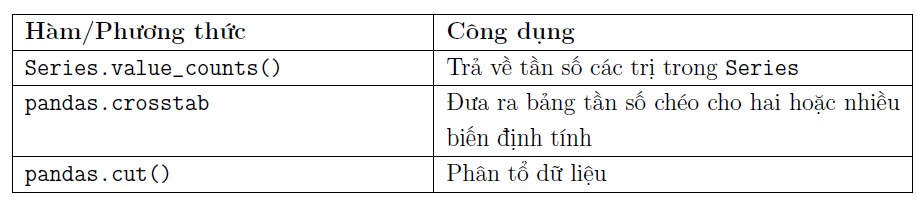

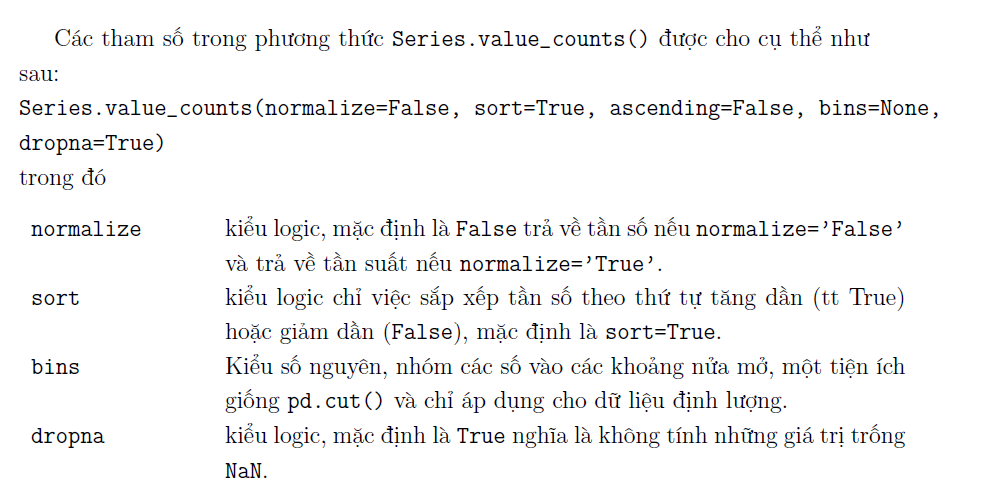

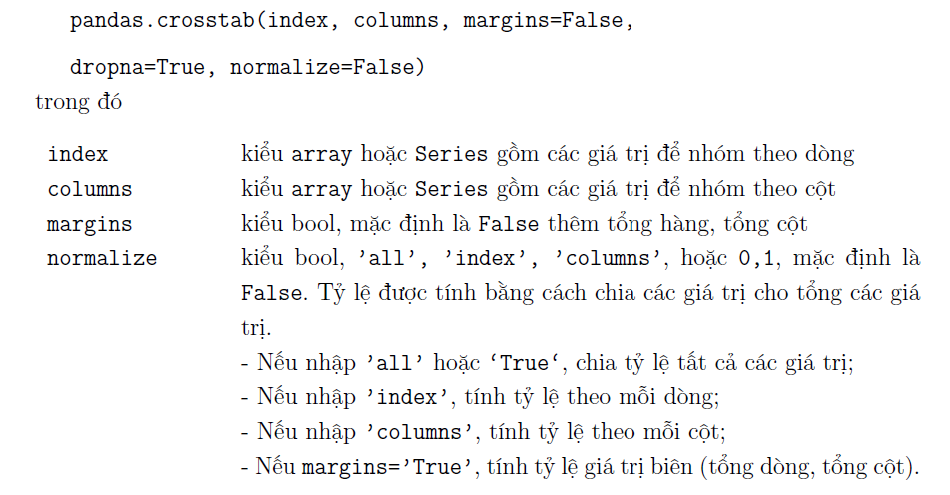

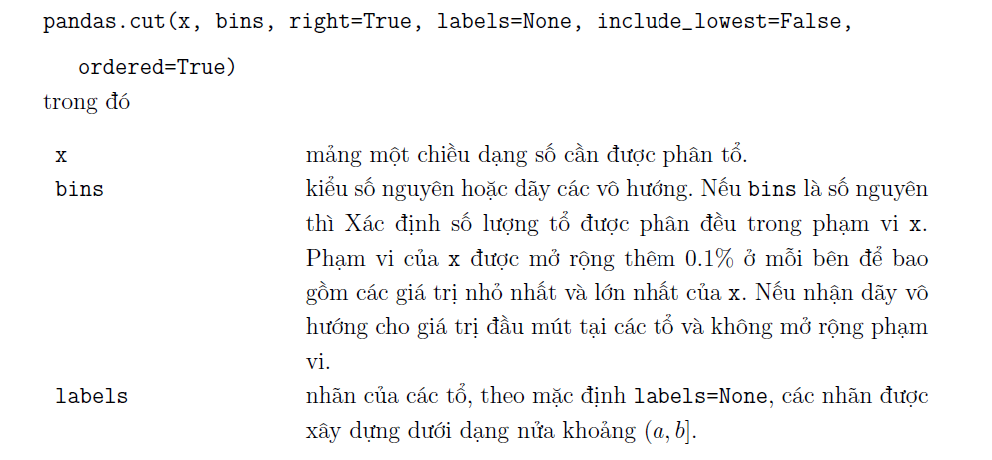

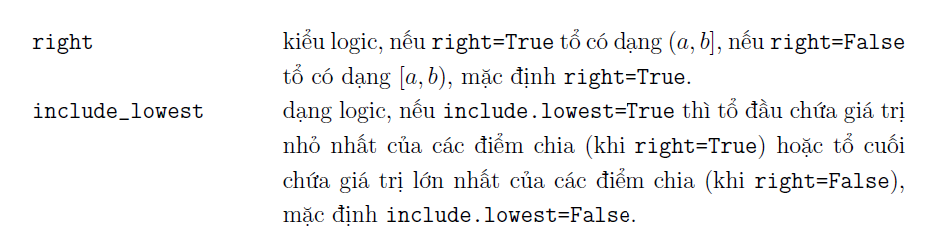

#### Bài 5 + Bài 9

Trong file dữ liệu có tên là SoLieu.csv chứa một số thông tin cá nhân của
100 người về giới tính (GioiTinh), tuổi (Tuoi), khu vực sống (KhuVuc) và tổng thu
nhập (đơn vị triệu VND) trong năm 2008 (ThuNhap). Hãy lấy file dữ liệu và thực
hiện các yêu cầu sau:

a. Trong nhóm được điều tra có bao nhiêu nam và có bao nhiêu người sống ở thành
phố.

b. Tính số nam sống ở hải đảo và nữ sống ở nông thôn trong nhóm những người
được điều tra.

c. Trong số nữ được điều tra, hãy tính tỉ lệ nữ sống ở thành phố và miền núi.

d. Tiến hành phân tổ cột dữ liệu về tuổi thành các tổ với các điểm chia là 20, 30, 40, 50, 60, 70, 80
và tính tỉ lệ những người được điều tra có độ tuổi không vượt quá 50.

e. Tiến hành phân tổ cột dữ liệu về thu nhập thành các tổ với các điểm chia là
20, 30, 40, 50, 60, 70, 80, 90, 100 và cho nhận xét

f. Vẽ biểu đồ phân phối tần số cho cột thu nhập. Biểu đồ này cho ta thông tin gì về phân phối của thu nhập của nhóm được điều tra.

g. Vẽ biểu đồ thanh minh họa phân phối tần số của khu vực sống và đưa ra nhận
xét.

h. Vẽ biểu đồ thanh minh họa phân phối tần số giới tính trong nhóm được điều tra
theo khu vực sống và khu vực sống theo giới tính của nhóm được điều tra.

i. Vẽ biểu đồ tròn minh họa phân phối tần số của khu vực sống và đưa ra nhận xét.


In [1]:
import pandas as pd
df = pd.read_csv('Du_lieu/SoLieu.csv')
df.head()

,STT,GioiTinh,Tuoi,KhuVuc,ThuNhap
0,1,Nam,30,NongThon,30
1,2,Nu,27,ThanhPho,40
2,3,Nu,32,MienNui,25
3,4,Nam,31,NongThon,35
4,5,Nu,41,HaiDao,42


In [2]:
#a. Trong nhóm được điều tra có bao nhiêu nam 
df.GioiTinh.value_counts()

GioiTinh
Nam    55
Nu     45
Name: count, dtype: int64

In [3]:
#a. và có bao nhiêu người sống ở thành phố.
df.KhuVuc.value_counts()

ThanhPho    42
MienNui     26
NongThon    20
HaiDao      12
Name: KhuVuc, dtype: int64

In [4]:
#b. Tính số nam sống ở hải đảo và nữ sống ở nông thôn trong nhóm những người được điều tra.
pd.crosstab(df.GioiTinh, df.KhuVuc)

KhuVuc,HaiDao,MienNui,NongThon,ThanhPho
GioiTinh,,,,
Nam,6,13,10,26
Nu,6,13,10,16


In [4]:
#c. Trong số nữ được điều tra, hãy tính tỉ lệ nữ sống ở thành phố và miền núi.
pd.crosstab(df.GioiTinh, df.KhuVuc, normalize='index')

KhuVuc,HaiDao,MienNui,NongThon,ThanhPho
GioiTinh,,,,
Nam,0.109091,0.236364,0.181818,0.472727
Nu,0.133333,0.288889,0.222222,0.355556


In [6]:
# d. Tiến hành phân tổ cột dữ liệu về tuổi thành các tổ với các điểm chia là 20, 30, 40, 50, 60, 70, 80
#Tính min, max của cột tuổi
print(df.Tuoi.min())
print(df.Tuoi.max())
chia_tuoi = pd.cut(df.Tuoi, bins=[20, 30, 40, 50, 60, 70, 80])
chia_tuoi.value_counts()

24
78


(30, 40]    41
(20, 30]    20
(60, 70]    13
(40, 50]    12
(50, 60]    12
(70, 80]     2
Name: Tuoi, dtype: int64

In [7]:
#và tính tỉ lệ những người được điều tra có độ tuổi không vượt quá 50.
tuoi_50 = df[df.Tuoi <= 50].shape[0]
so_nguoi = df.shape[0]
ty_le_50 = tuoi_50/so_nguoi
print('Tỷ lệ có độ tuổi không vượt quá 50 là:', ty_le_50)

Tỷ lệ có độ tuổi không vượt quá 50 là: 0.73


In [8]:
#e. Tiến hành phân tổ cột dữ liệu về thu nhập thành các tổ với các điểm chia là 
#20, 30, 40, 50, 60, 70, 80, 90, 100 và cho nhận xét
#Tính GTNN và GTLN
print(df.ThuNhap.min())
print(df.ThuNhap.max())

#Phân tổ thu nhập không có tham số include_lowest=True trong hàm cut
chia_tn1 = pd.cut(df.ThuNhap, bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])
print(chia_tn1.value_counts()) #thiếu GTNN 20 trong tổ đầu (20,30]

#Phân tổ thu nhập có tham số include_lowest=True trong hàm cut
chia_tn2 = pd.cut(df.ThuNhap, bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)
print(chia_tn2.value_counts()) #có GTNN 20 trong tổ đầu (19.999,30]


20
100
(40, 50]     30
(20, 30]     28
(30, 40]     10
(70, 80]      9
(90, 100]     6
(60, 70]      5
(50, 60]      2
(80, 90]      1
Name: ThuNhap, dtype: int64
(19.999, 30.0]    37
(40.0, 50.0]      30
(30.0, 40.0]      10
(70.0, 80.0]       9
(90.0, 100.0]      6
(60.0, 70.0]       5
(50.0, 60.0]       2
(80.0, 90.0]       1
Name: ThuNhap, dtype: int64


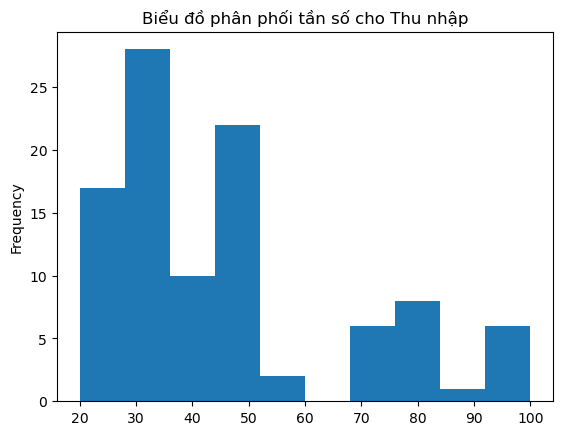

In [12]:
#f. Vẽ biểu đồ phân phối tần số cho cột thu nhập. 
#Biểu đồ này cho ta thông tin gì về phân phối của thu nhập của nhóm được điều tra.
df.ThuNhap.plot(kind='hist', title='Biểu đồ phân phối tần số cho Thu nhập');


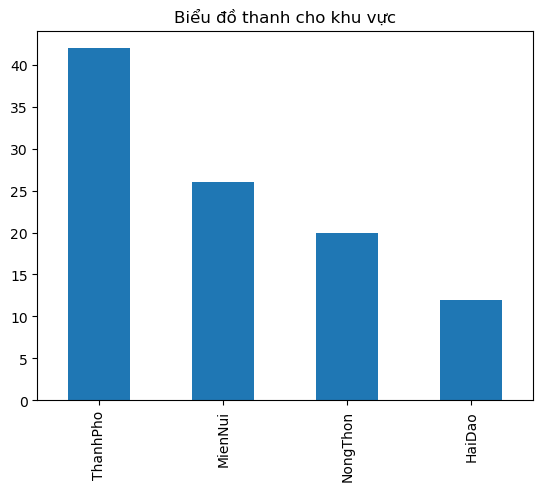

In [14]:
#g. Vẽ biểu đồ thanh minh họa phân phối tần số của khu vực sống và đưa ra nhận xét.
df.KhuVuc.value_counts().plot(kind='bar', title='Biểu đồ thanh cho khu vực');

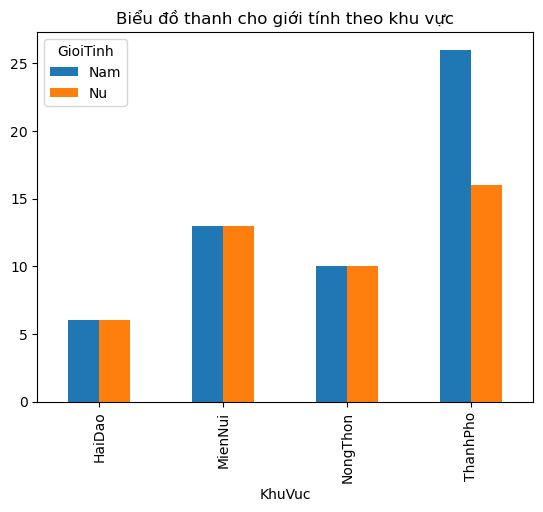

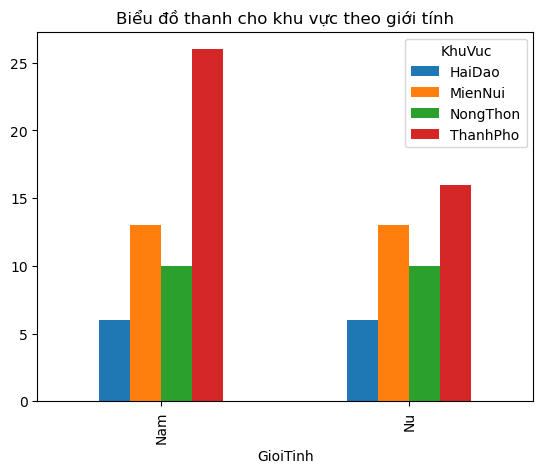

In [21]:
#h. Vẽ biểu đồ thanh minh họa phân phối tần số giới tính trong nhóm được điều tra
#theo khu vực sống và khu vực sống theo giới tính của nhóm được điều tra.

#Biểu đồ thanh cho giới tính theo khu vực
gt_kv = pd.crosstab(df.KhuVuc, df.GioiTinh)
gt_kv.plot(kind='bar', title='Biểu đồ thanh cho giới tính theo khu vực');

#Biểu đồ thanh cho giới tính theo khu vực
gt_kv = pd.crosstab(df.GioiTinh, df.KhuVuc)
gt_kv.plot(kind='bar', title='Biểu đồ thanh cho khu vực theo giới tính');

<AxesSubplot:title={'center':'Biểu đồ tròn cho khu vực'}, ylabel='KhuVuc'>

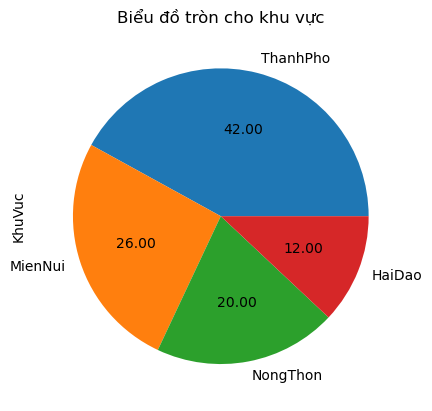

In [40]:
#i. Biểu đồ tròn cho Khu vực
df.KhuVuc.value_counts().plot(kind='pie', autopct='%0.2f', title='Biểu đồ tròn cho khu vực')